# Ternary free energy surface for IN625 from toy CALPHAD DB

In [87]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import ternary
from pycalphad import Database, calculate
from scipy.optimize import curve_fit
from scipy.interpolate import SmoothBivariateSpline

simplex_res = 50

In [88]:
tdb = Database('mc_ni_v2.033.tdb')

In [89]:
phases = ['LIQUID', 'FCC_A1', 'GAMMA_PRIME', 'GAMMA_DP', 'DELTA']
elements = ['NI', 'AL', 'NB', 'VA']
temp = 900 + 273.15 # Kelvin

## Visualize free energy of γ

In [90]:
gamma_data = calculate(tdb, elements, 'FCC_A1', T=temp, output='GM')
gamma_x_Ni = np.ravel(gamma_data.X.sel(component='NI'))
gamma_x_Al = np.ravel(gamma_data.X.sel(component='AL'))
gamma_x_Nb = np.ravel(gamma_data.X.sel(component='NB'))
gamma_z = np.ravel(gamma_data.GM)

gamma_interp = SmoothBivariateSpline(gamma_x_Al, gamma_x_Nb, gamma_z)

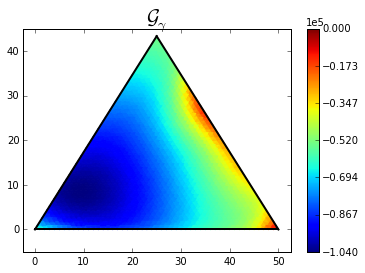

In [91]:
def gamma_f(p):
    return float(gamma_interp(p[0], p[1]))

figure, tax = ternary.figure(scale=simplex_res)

tax.heatmapf(gamma_f, boundary=True, style="triangular")
tax.boundary(linewidth=2.0)
tax.set_title(r'$\mathcal{G}_{\gamma}$',fontsize=20)

tax.show()

## Visualize free energy of γ'

In [92]:
gamma_prime_data = calculate(tdb, elements, 'GAMMA_prime', T=temp, output='GM')
gamma_prime_x_Ni = np.ravel(gamma_prime_data.X.sel(component='NI'))
gamma_prime_x_Al = np.ravel(gamma_prime_data.X.sel(component='AL'))
gamma_prime_x_Nb = np.ravel(gamma_prime_data.X.sel(component='NB'))
gamma_prime_z = np.ravel(gamma_prime_data.GM)

gamma_prime_interp = SmoothBivariateSpline(gamma_prime_x_Al, gamma_prime_x_Nb, gamma_prime_z)

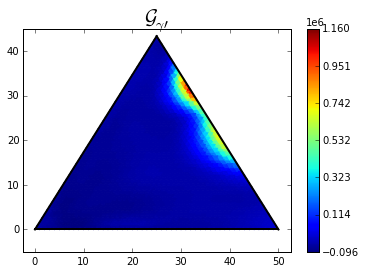

In [93]:
def gamma_prime_f(p):
    return float(gamma_prime_interp(p[0], p[1]))

figure, tax = ternary.figure(scale=simplex_res)

tax.heatmapf(gamma_prime_f, boundary=True, style="triangular")
tax.boundary(linewidth=2.0)
tax.set_title(r'$\mathcal{G}_{\gamma\prime}$',fontsize=20)

tax.show()

## Visualize free energy of γ''

In [94]:
gamma_dp_data = calculate(tdb, elements, 'GAMMA_DP', T=temp, output='GM')
gamma_dp_x_Ni = np.ravel(gamma_dp_data.X.sel(component='NI'))
gamma_dp_x_Al = np.ravel(gamma_dp_data.X.sel(component='AL'))
gamma_dp_x_Nb = np.ravel(gamma_dp_data.X.sel(component='NB'))
gamma_dp_z = np.ravel(gamma_dp_data.GM)

gamma_dp_interp = SmoothBivariateSpline(gamma_dp_x_Al, gamma_dp_x_Nb, gamma_dp_z)

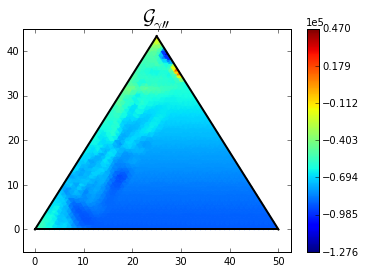

In [95]:
def gamma_dp_f(p):
    return float(gamma_dp_interp(p[0], p[1]))

figure, tax = ternary.figure(scale=simplex_res)

tax.heatmapf(gamma_dp_f, boundary=True, style="triangular")
tax.boundary(linewidth=2.0)
tax.set_title(r'$\mathcal{G}_{\gamma\prime\prime}$',fontsize=20)

tax.show()

## Visualize free energy of 𝛿

In [96]:
delta_data = calculate(tdb, elements, 'DELTA', T=temp, output='GM')
delta_x_Ni = np.ravel(delta_data.X.sel(component='NI'))
delta_x_Al = np.ravel(delta_data.X.sel(component='AL'))
delta_x_Nb = np.ravel(delta_data.X.sel(component='NB'))
delta_z = np.ravel(delta_data.GM)

delta_interp = SmoothBivariateSpline(delta_x_Al, delta_x_Nb, delta_z)

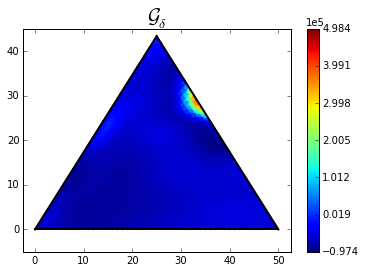

In [97]:
def delta_f(p):
    return float(delta_interp(p[0], p[1]))

figure, tax = ternary.figure(scale=simplex_res)

tax.heatmapf(delta_f, boundary=True, style="triangular")
tax.boundary(linewidth=2.0)
tax.set_title(r'$\mathcal{G}_{\delta}$',fontsize=20)

tax.show()

## Exploring pycalphad data

In [101]:
len(gamma_x_Ni)

20006